In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.fft as fourier
import time


1 часть

In [11]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x) 


 0.0009925365447998047 секунд fft
 0.1249997615814209 секунд DFT_slow


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


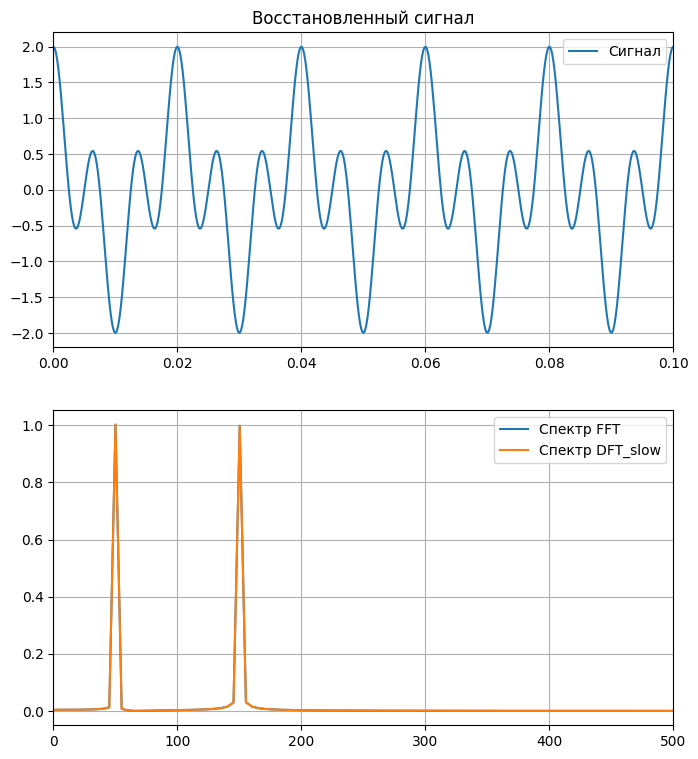

In [12]:
def cos_function(t, f, A):
  return A * np.cos(2 * np.pi * f * t)

sample_rate = 5000 # Дискретизац. частота

f1 = 50 # Частоты
f2 = 150


A = 1.0 # Амплитуда

lenght = 0.05 # Длина расчёта функции

N = 1000 # Число точек для расчёта функции
T = 1/sample_rate

t = np.linspace(0, N*T, N)
xt = np.linspace(0.0, 1/(T*2), N//2)
cos50 = cos_function(t, f1, A)
cos150 = cos_function(t, f2, A)

result = cos50 + cos150
start_time = time.time()

spectrum = fourier.fft(result)

print(" %s секунд fft" % (time.time() - start_time))

start_time = time.time()

dft_spectrum = DFT_slow(result)
print(" %s секунд DFT_slow" % (time.time() - start_time))
#fr, spec = fourier_transform(result, sample_rate)

fig, axs = plt.subplots(2, 1, figsize=(8, 9))

restored_signal_ifft = fourier.ifft(dft_spectrum)

axs[0].plot(t,restored_signal_ifft, label='Сигнал')
axs[0].set_title("Восстановленный сигнал")
axs[0].set_xlim(0, 0.1)
axs[0].grid(True)
axs[0].legend()

axs[1].plot(xt, np.abs(spectrum[:N//2] * 2 / N), label="Cпектр FFT")
axs[1].plot(xt, np.abs(dft_spectrum[:N//2] * 2 / N), label="Cпектр DFT_slow")
axs[1].set_xlim(0, 500)
axs[1].grid(True)
axs[1].legend()

Добавляем шум

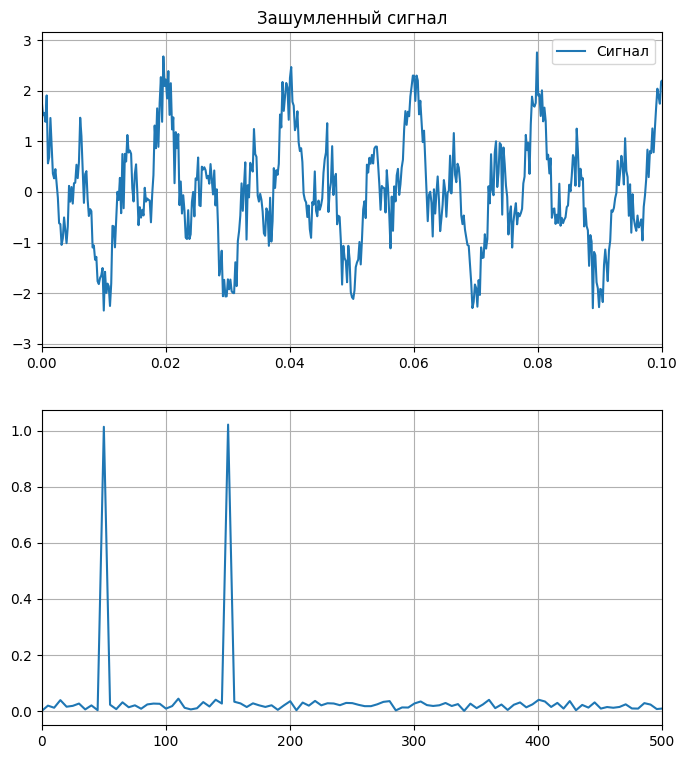

In [13]:
noise_amp = 0.35
noise_arr = noise_amp * np.random.normal(0, 1, len(result))

result = result + noise_arr

noise_spectrum = fourier.fft(result)

fig, axs = plt.subplots(2, 1, figsize=(8, 9))



axs[0].plot(t, result, label='Сигнал')
axs[0].set_title("Зашумленный сигнал")
axs[0].set_xlim(0, 0.1)
axs[0].grid(True)
axs[0].legend()

axs[1].plot(xt, np.abs(noise_spectrum[:N//2] * 2 / N), label="Cпектр")
axs[1].set_xlim(0, 500)
axs[1].grid(True)


2 пункт

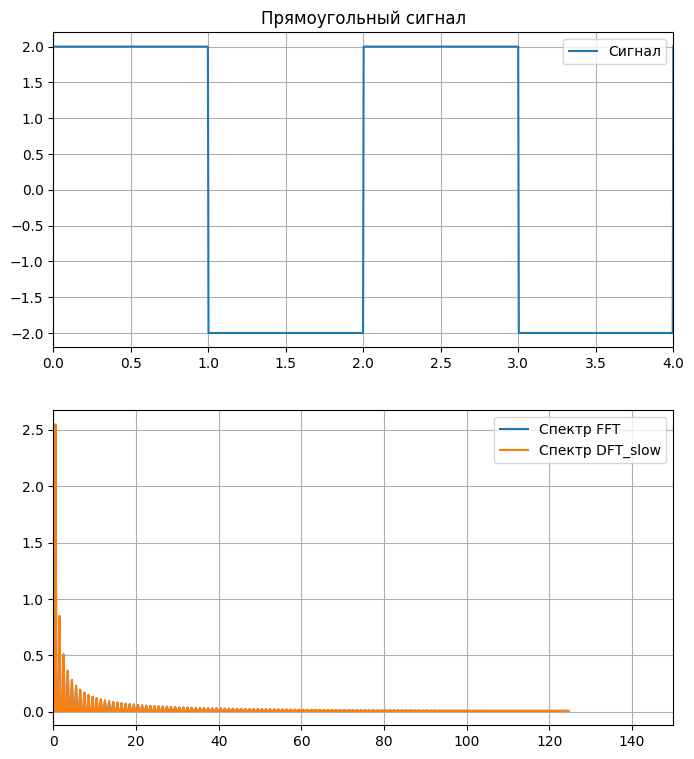

In [14]:
def rect_signal(t, period, A):
  return np.where((t % period) < (period / 2), A, -A)

t = np.linspace(0, 4, N)
#xt = np.linspace(0, N, N//2)
p = 2
A = 2

signal = rect_signal(t, p, A)

rect_spectrum = fourier.fft(signal)
rect_spectrum_2 = DFT_slow(signal)

fig, axs = plt.subplots(2, 1, figsize=(8, 9))

xt = fourier.fftfreq(len(signal), d=t[1]-t[0])

axs[0].plot(t, signal, label='Сигнал')
axs[0].set_title("Прямоугольный сигнал")
axs[0].set_xlim(0, 4)
axs[0].grid(True)
axs[0].legend()

axs[1].plot(xt, np.abs(rect_spectrum * 2 / N), label="Cпектр FFT")
axs[1].plot(xt, np.abs(rect_spectrum_2 * 2 / N), label="Cпектр DFT_slow")
axs[1].set_xlim(0, 150)
axs[1].legend()
axs[1].grid(True)


<class 'numpy.ndarray'>


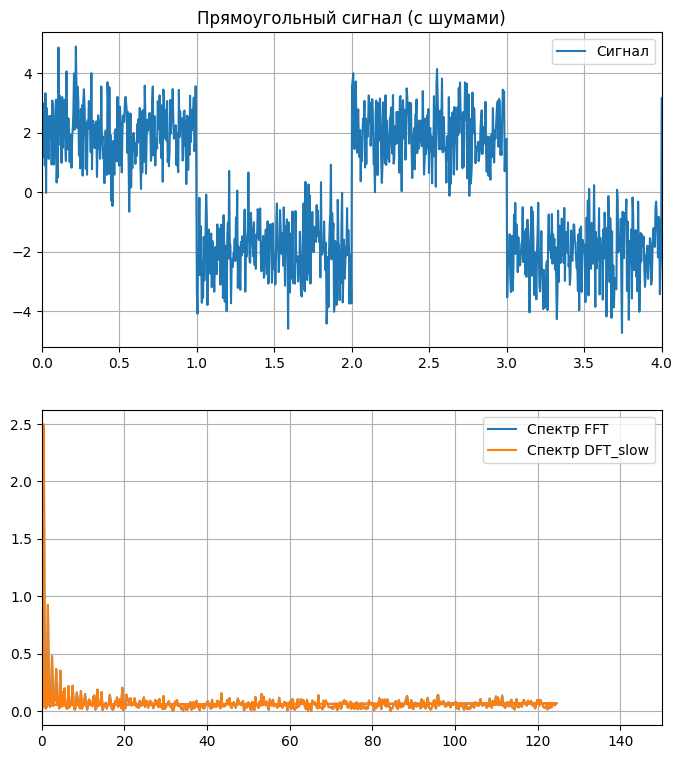

In [15]:
noise_amp = 1 # Амплитуда шума
noise_arr = noise_amp * np.random.normal(0, 1, len(signal))

signal = signal + noise_arr


rect_spectrum = fourier.fft(signal)
rect_spectrum_2 = DFT_slow(signal)
print(type(rect_spectrum_2))
fig, axs = plt.subplots(2, 1, figsize=(8, 9))



axs[0].plot(t, signal, label='Сигнал')
axs[0].set_title("Прямоугольный сигнал (c шумами)")
axs[0].set_xlim(0, 4)
axs[0].grid(True)
axs[0].legend()

axs[1].plot(xt, np.abs(rect_spectrum * 2 / N), label="Cпектр FFT")
axs[1].plot(xt, np.abs(rect_spectrum_2 * 2 / N), label="Cпектр DFT_slow")
axs[1].set_xlim(0, 150)
axs[1].legend()
axs[1].grid(True)

Реализуем fdft

123 ms ± 5.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.2 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
18.3 ms ± 533 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


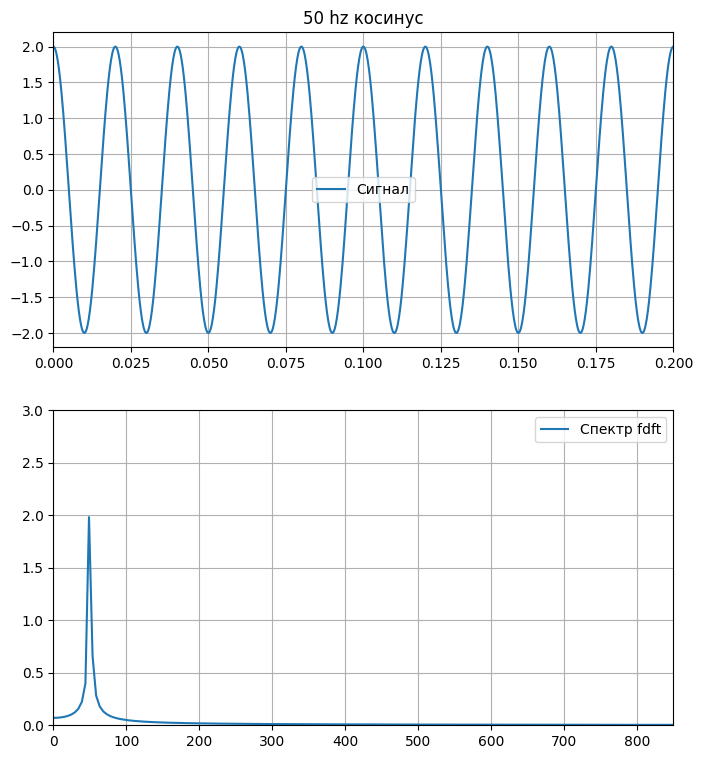

In [16]:


def FDFT(x):
    size = len(x)
    if size <= 1:
        return x
    if size % 2 != 0:
        raise ValueError("Only 2 power can be used for fdft")
    
    even = FDFT(x[0::2])
    odd = FDFT(x[1::2])

    T = [np.exp(-2j * np.pi * k / size) * odd[k] for k in range(size // 2)]
    return [even[k] + T[k] for k in range(size // 2)] + [even[k] - T[k] for k in range(size // 2)]


N = 1024
t = np.linspace(0, N*T, N)
xt = np.linspace(0.0, 1/(T), N)
f1 = 50
A = 2
cos50 = cos_function(t, f1, A)

%timeit DFT_slow(t)
%timeit np.fft.fft(t)
%timeit FDFT(t)
rect_spectrum_3 = FDFT(cos50)
fig, axs = plt.subplots(2, 1, figsize=(8, 9))



axs[0].plot(t, cos50, label='Сигнал')
axs[0].set_title("50 hz косинус")
axs[0].set_xlim(0, 0.2)
axs[0].grid(True)
axs[0].legend()

#axs[1].plot(xt, np.abs(rect_spectrum * 2 / N), label="Cпектр FFT")
axs[1].plot(xt, np.abs(np.array(rect_spectrum_3) * 2.2 / N), label="Cпектр fdft")
axs[1].set_ylim(0, 3)
axs[1].set_xlim(0, 850)
axs[1].legend()
axs[1].grid(True)